# Knapsack problem

# context

You're a burglar with a knapsack that can hold a total weight of capacity. You have a set of items (n items) each with fixed weight capacities and values. The weight and value are represented in an array. Find a subset or number of these items that will maximize value but whose total weight does not exceed the given number capacity.

# why use branch and bound

A **Greedy approach** is to pick the items in decreasing order of value per unit weight. The Greedy approach works only for **fractional knapsack** problem and may not produce correct result for **0/1 knapsack**.

We can use **Dynamic Programming (DP)** for 0/1 Knapsack problem. In DP, we use a 2D table of size n x W. The DP Solution **doesn’t work if item weights are not integers**.

Since DP solution doesn’t always work, a solution is to use Brute Force. With n items, there are $2^n$ solutions to be generated, check each to see if they satisfy the constraint, save maximum solution that satisfies constraint. This solution can be expressed as tree. 

We can use **Backtracking** to optimize the Brute Force solution. In the tree representation, we can do DFS of tree. If we reach a point where a solution no longer is feasible, there is no need to continue exploring. In the given example, backtracking would be much more effective if we had even more items or a smaller knapsack capacity.

![Alt text](Screenshot%202023-04-13%20230805.png)

In [18]:
import random
import time
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [19]:
import sys
print(sys.getrecursionlimit())

4000


In [20]:
sys.setrecursionlimit(4000)

In [21]:
from queue import PriorityQueue

class Item:
    def __init__(self, value, weight):
        self.value = value
        self.weight = weight

class Node:
    def __init__(self, level, value, weight, bound):
        self.level = level
        self.value = value
        self.weight = weight
        self.bound = bound

    def __lt__(self, other):
        return self.bound > other.bound

def knapsack_01_branch_and_bound(values, weights, capacity):
    items = [Item(v, w) for v, w in zip(values, weights)]
    # items.sort(key=lambda x: x.value / x.weight, reverse=True)

    max_value = 0
    n = len(items)
    Q = PriorityQueue()
    root = Node(0, 0, 0, calc_bound(0, 0, 0, items))
    Q.put(root)

    while not Q.empty():
        curr_node = Q.get()
        if curr_node.bound > max_value:
            level = curr_node.level + 1
            weight = curr_node.weight + items[curr_node.level].weight
            value = curr_node.value + items[curr_node.level].value

            if weight <= capacity and value > max_value:
                max_value = value
            #test if the current item is not needed to include
            bound = calc_bound(level, weight, value, items)
            if bound > max_value:
                Q.put(Node(level, value, weight, bound))

            #test if the current item is needed to include
            bound = calc_bound(level, curr_node.weight, curr_node.value, items)
            if bound > max_value:
                Q.put(Node(level, curr_node.value, curr_node.weight, bound))

    return max_value

def calc_bound(level, weight, value, items):
    n = len(items)
    
    if weight >= capacity:
        return 0
    else:
        upper_bound = value
        total_weight = weight
        while level < n and total_weight + items[level].weight <= capacity:
            upper_bound += items[level].value
            total_weight += items[level].weight
            level += 1
        if level < n:
            upper_bound += (capacity - total_weight) * (items[level].value / items[level].weight)
        return upper_bound

In [22]:
values = [45, 48, 36]
weights = [5, 8, 3]
capacity = 10
knapsack_01_branch_and_bound(values, weights, capacity)

81

In [23]:
class Item:
    def __init__(self, value, weight):
        self.value = value
        self.weight = weight

def knapsack_01_branch_and_bound_recursive(values, weights, capacity):
    items = [Item(v, w) for v, w in zip(values, weights)]
    items.sort(key=lambda x: x.value / x.weight, reverse=True)

    n = len(items)
    max_value = knapsack_recursive_helper(0, 0, 0, capacity, items, n, 0)

    return max_value

def knapsack_recursive_helper(level, value, weight, capacity, items, n, max_value):
    if weight > capacity:
        return 0
    
    if level == n:
        return max(value, max_value)

    bound = calc_bound_recursive(level, weight, value, items, capacity, n)
    if bound < max_value:
        return max_value
    
    max_value = knapsack_recursive_helper(level+1, value+items[level].value, weight+items[level].weight, capacity, items, n, max_value)
    max_value = knapsack_recursive_helper(level+1, value, weight, capacity, items, n, max_value)

    return max_value

def calc_bound_recursive(level, weight, value, items, capacity, n):
    bound = value
    total_weight = weight
    for i in range(level, n):
        if total_weight + items[i].weight <= capacity:
            bound += items[i].value
            total_weight += items[i].weight
        else:
            bound += (capacity - total_weight) * (items[i].value / items[i].weight)
            break
    
    return bound


In [24]:
knapsack_01_branch_and_bound_recursive(values, weights, capacity)

81

In [25]:
class Item:
    def __init__(self, value, weight):
        self.value = value
        self.weight = weight

class Node:
    def __init__(self, level, value, weight, bound):
        self.level = level
        self.value = value
        self.weight = weight
        self.bound = bound

    def __lt__(self, other):
        return self.bound > other.bound

def knapsack_01_branch_and_bound_sorted(values, weights, capacity):
    items = [Item(v, w) for v, w in zip(values, weights)]
    items.sort(key=lambda x: x.value / x.weight, reverse=True)

    max_value = 0
    n = len(items)
    Q = PriorityQueue()
    root = Node(0, 0, 0, calc_bound(0, 0, 0, items))
    Q.put(root)

    while not Q.empty():
        curr_node = Q.get()
        if curr_node.bound > max_value:
            level = curr_node.level + 1
            weight = curr_node.weight + items[curr_node.level].weight
            value = curr_node.value + items[curr_node.level].value

            if weight <= capacity and value > max_value:
                max_value = value

            bound = calc_bound(level, weight, value, items)
            if bound > max_value:
                Q.put(Node(level, value, weight, bound))

            bound = calc_bound(level, curr_node.weight, curr_node.value, items)
            if bound > max_value:
                Q.put(Node(level, curr_node.value, curr_node.weight, bound))

    return max_value

def calc_bound(level, weight, value, items):
    n = len(items)
    
    if weight >= capacity:
        return 0
    else:
        upper_bound = value
        total_weight = weight
        while level < n and total_weight + items[level].weight <= capacity:
            upper_bound += items[level].value
            total_weight += items[level].weight
            level += 1
        if level < n:
            upper_bound += (capacity - total_weight) * (items[level].value / items[level].weight)
        return upper_bound

In [26]:
capacity = 9000

In [27]:
items = []
time = []
time_sorted = []
time_recursive = []

for i in range(100):
    n = 1000 + i
    items.append(n)
    values = [random.randint(1, 100) for _ in range(n)]
    weights = [random.randint(1, 10) for _ in range(n)]
    
    start = timer()
    knapsack_01_branch_and_bound(values, weights, capacity)
    end = timer()
    time.append(end - start)
    
    start = timer()
    knapsack_01_branch_and_bound_sorted(values, weights, capacity)
    end = timer()
    time_sorted.append(end - start)
    
    start = timer()
    knapsack_01_branch_and_bound_recursive(values, weights, capacity)
    end = timer()
    time_recursive.append(end - start)

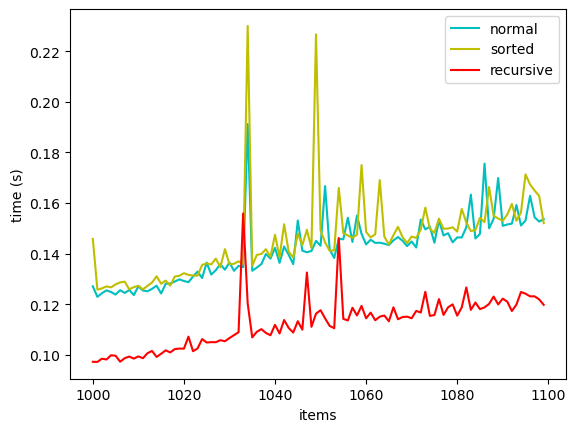

In [28]:
plt.plot(items, time, 'c', label='normal')
plt.plot(items, time_sorted, 'y', label='sorted')
plt.plot(items, time_recursive, 'r', label='recursive')

plt.xlabel("items")
plt.ylabel("time (s)")

plt.legend()

In [29]:
iter = [_ for _ in range(1, 101)]
time = []
time_sorted = []
time_recursive = []

for i in range(100):
    n = 1000

    values = [random.randint(1, 100) for _ in range(n)]
    weights = [random.randint(1, 10) for _ in range(n)]
    
    start = timer()
    knapsack_01_branch_and_bound(values, weights, capacity)
    end = timer()
    time.append(end - start)
    
    start = timer()
    knapsack_01_branch_and_bound_sorted(values, weights, capacity)
    end = timer()
    time_sorted.append(end - start)
    
    start = timer()
    knapsack_01_branch_and_bound_recursive(values, weights, capacity)
    end = timer()
    time_recursive.append(end - start)

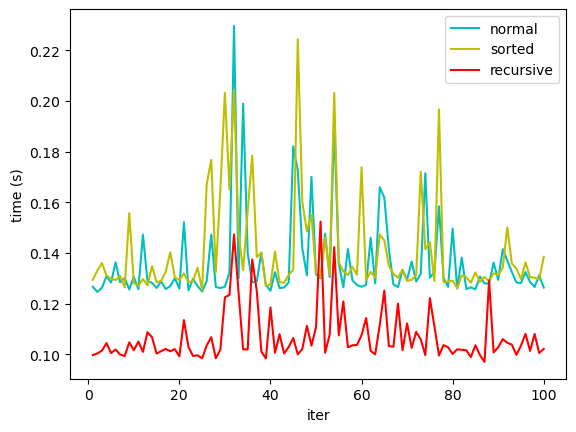

In [30]:
plt.plot(iter, time, 'c', label='normal')
plt.plot(iter, time_sorted, 'y', label='sorted')
plt.plot(iter, time_recursive, 'r', label='recursive')

plt.xlabel("iter")
plt.ylabel("time (s)")

plt.legend()